In [22]:
import pandas as pd
df=pd.read_csv('./표준화완성본.csv')
df

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,...,age_group_gender_seventies_Female,age_group_gender_seventies_Male,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male
0,-0.326221,-0.402237,0.439067,0.511633,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.440036,-1.141788,0.517514,0.726664,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.536794,0.464244,-0.450913,-0.705735,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.501521,-0.201650,1.239547,-0.534073,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2.063884,-0.342349,0.514829,0.083927,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,-0.201650,-0.361412,-0.510598,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9996,-1.391939,-1.511880,-0.952871,0.518374,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,0.604988,0.032368,-0.561532,-0.626813,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,1.256835,-1.376280,-0.409684,-0.543083,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# 표준화된 데이터 말고 주성분 분석을 했다
# 주성분 데이터프레임으로 모델 학습을 시도한다

# 주성분 데이터프레임-표준화, 원핫인코딩, 종속 변수 제외

In [24]:
df2 = df[df.columns.difference(['churn'])]

# pca

In [25]:
import pandas as pd
from sklearn.decomposition import PCA

n=6
li=[]
for i in range(1,n+1):
    prin=f'principal {i}'
    li.append(prin)

# 2. PCA 적용
pca = PCA(n_components=n)  # 주성분의 개수 설정
principal_components = pca.fit_transform(df2)

# 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=principal_components, columns=li)

In [26]:
pca_df

,principal 1,principal 2,principal 3,principal 4,principal 5,principal 6
0,-0.081152,0.714698,0.111165,0.511516,0.620504,0.250174
1,-0.612193,1.034555,0.228446,0.993473,-0.566902,0.786106
2,-0.001868,0.225956,-1.739145,-0.414447,0.543115,-0.440954
3,0.708717,-0.490695,0.242860,1.120250,0.624937,-0.463350
4,0.058692,-0.990903,1.844525,0.639159,-0.581803,0.739728
...,...,...,...,...,...,...
9995,-0.300257,-1.169865,0.694020,-0.093036,0.626421,-0.238671
9996,-1.760475,1.175212,-0.819321,0.081631,0.675815,0.500717
9997,-0.287707,-0.960169,0.081031,-0.292959,0.620921,0.218612
9998,-1.328276,-1.046260,0.837419,0.730312,-0.581993,-0.908688


In [27]:
pca.explained_variance_ratio_.cumsum()

array([0.19967529, 0.37673071, 0.55023557, 0.70588981, 0.77126845,
       0.81608634])

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
warnings.filterwarnings('ignore')

In [29]:
x = pca_df
y = df['churn']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
# y_train_pred = model.predict(x_train)
# print(f'Accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

# y_test_pred = model.predict(x_test)
# print(f'Accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# random forest

train accuracy:1.0000
test accuracy:0.8240
Precision: 0.6228
Recall: 0.2646
F1 Score: 0.3714
Confusion Matrix:
[[1544   63]
 [ 289  104]]
ROC AUC: 0.7449


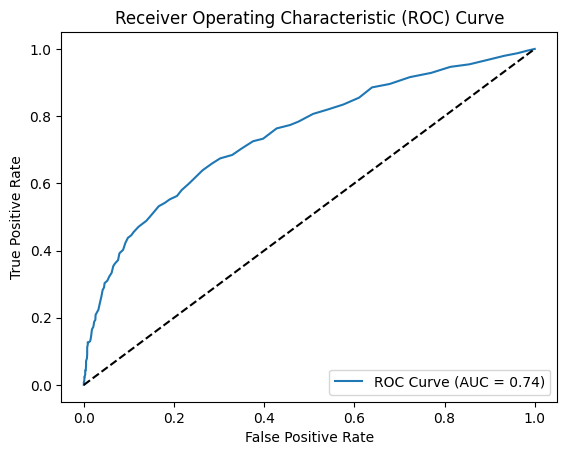

Cross-Validation Scores: [0.8235 0.82   0.817  0.8155 0.816 ]
Mean CV Accuracy: 0.8184


In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = rf.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

y_pred_proba = rf.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(rf, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# xgboost

In [36]:
xgb=XGBClassifier(random_state=42)

xgb.fit(x_train,y_train)

y_train_pred = xgb.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = xgb.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

train accuracy:0.9476
test accuracy:0.8180


# decision tree

In [37]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt = DecisionTreeClassifier(random_state=42)

dt.fit(x_train,y_train)

y_train_pred = dt.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = dt.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# # 분류 보고서
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # 혼동 행렬
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

train accuracy:1.0000
test accuracy:0.7445


# logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 로지스틱 회귀 모델 초기화
lr = LogisticRegression(
    # solver='liblinear',
    random_state=42)

lr.fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = lr.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# # 분류 보고서
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # 혼동 행렬
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

train accuracy:0.8034
test accuracy:0.8150


# support vector machine

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# SVM 모델 초기화
svc = SVC(random_state=42)

svc.fit(x_train,y_train)

y_train_pred = svc.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = svc.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# # 분류 보고서
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # 혼동 행렬
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

train accuracy:0.8059
test accuracy:0.8095


# artificial neural network

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 인공 신경망 모델 초기화
# hidden_layer_sizes는 각 은닉층의 뉴런 수를 설정
mlp = MLPClassifier(random_state=42)

mlp.fit(x_train,y_train)

y_train_pred = mlp.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = mlp.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')


train accuracy:0.8147
test accuracy:0.8160


# light gbm

In [41]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)

lgbm.fit(x_train,y_train)

y_train_pred = lgbm.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = lgbm.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
train accuracy:0.8812
test accuracy:0.8190


# gradient boosting machine

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(x_train,y_train)

y_train_pred = gb.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = gb.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

train accuracy:0.8356
test accuracy:0.8260


# naive bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)

y_train_pred = nb.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = nb.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

train accuracy:0.8024
test accuracy:0.8185


# 모델 평가

In [44]:
# 정확도-올바르게 분류된 샘플의 비율
# 정밀도-양성으로 예측한 샘플 중 실제로 양성인 샘플의 비율, 클래스의 불균형이 있을 경우 중요
# 재현율-실제 양성 샘플 중 양성으로 올바르게 예측된 비율, 놓치는 것을 최소화
# f1 점수-정밀도와 재현율의 조화 평균, 두 지표의 균형을 고려할 때 유용
# 혼동 행렬-예측과 실제 값 간의 관계 시각화
# roc 곡선 및 auc
# 교차 검증-여러 데이터 분할에서 평가하여 보다 신뢰할 수 있는 결과 제공